# Kiva Crowdfunding

*Kiva.org is an online crowdfunding platform to extend financial services to poor and financially excluded people around the world. Kiva lenders have provided over $1 billion dollars in loans to over 2 million people. In order to set investment priorities, help inform lenders, and understand their target communities, knowing the level of poverty of each borrower is critical. However, this requires inference based on a limited set of information for each borrower.*

## Prediction and Models

* Not all loan requests are funded (about 3383 records in loans dataset that are not funded). Is there a pattern among the loans not funded? [Clustering]


* Predict if a loan request is likely to get funded or not [Logistic Regression] 


* Time taken for funding - Is this predictable based on Gender, Country/Region, Activity/Sector, Loan  Amount etc. ? [Linear Regression]


* Time taken for Repayment -  Is this predictable based on Gender, Country/Region, Activity/Sector, Loan Amount etc. ? [Linear Regression]


* Predict Loan Requests(Count/Amount) for a country/region based on past trends (year/month) [Linear Regression]


* Estimate the poverty level of a borrower for a given country/region  [???]


In [44]:
%matplotlib inline

# General libraries.
import re
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from mpl_toolkits.basemap import Basemap
color = sns.color_palette()
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py


In [2]:
os.getcwd()

'C:\\Users\\Amrit\\desktop\\sub_python_course\\ml\\KIVA\\w207-FinalProj'

## EDA

### Kiva Loans

In [3]:
df_kiva_loans = pd.read_csv("kiva_loans.csv")
df_kiva_loans.head()
df_kiva_loans.describe(include = 'all')

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
count,6.712050e+05,671205.000000,671205.000000,671205,671205,666977,671197,671205,614405,671205,657698.000000,671205,668809,622874,671205.000000,671205.000000,499789,666984,671205,671205
unique,NaN,NaN,NaN,163,15,424913,86,87,12695,67,NaN,667399,5719,498007,NaN,NaN,86719,11298,4,1298
top,NaN,NaN,NaN,Farming,Agriculture,to buy a water filter to provide safe drinking...,PH,Philippines,Kaduna,PHP,NaN,2017-05-15 00:00:00+00:00,2017-02-01 08:00:00+00:00,2016-09-21 13:03:24+00:00,NaN,NaN,user_favorite,female,monthly,2017-03-20
freq,NaN,NaN,NaN,72955,180302,5217,160441,160441,10000,160440,NaN,25,2800,33,NaN,NaN,27088,426502,342717,1308
mean,9.932486e+05,785.995061,842.397107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178.199616,NaN,NaN,NaN,13.739022,20.590922,NaN,NaN,NaN,NaN
std,1.966113e+05,1130.398941,1198.660073,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.247581,NaN,NaN,NaN,8.598919,28.459551,NaN,NaN,NaN,NaN
min,6.530470e+05,0.000000,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,NaN,NaN
25%,8.230720e+05,250.000000,275.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,NaN,NaN,NaN,8.000000,7.000000,NaN,NaN,NaN,NaN
50%,9.927800e+05,450.000000,500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.000000,NaN,NaN,NaN,13.000000,13.000000,NaN,NaN,NaN,NaN
75%,1.163653e+06,900.000000,1000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,204.000000,NaN,NaN,NaN,14.000000,24.000000,NaN,NaN,NaN,NaN


In [4]:
df_kiva_loans.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,6.712050e+05,671205.000000,671205.000000,657698.000000,671205.000000,671205.000000
mean,9.932486e+05,785.995061,842.397107,178.199616,13.739022,20.590922
std,1.966113e+05,1130.398941,1198.660073,94.247581,8.598919,28.459551
min,6.530470e+05,0.000000,25.000000,9.000000,1.000000,0.000000
25%,8.230720e+05,250.000000,275.000000,126.000000,8.000000,7.000000
50%,9.927800e+05,450.000000,500.000000,145.000000,13.000000,13.000000
75%,1.163653e+06,900.000000,1000.000000,204.000000,14.000000,24.000000
max,1.340339e+06,100000.000000,100000.000000,536.000000,158.000000,2986.000000


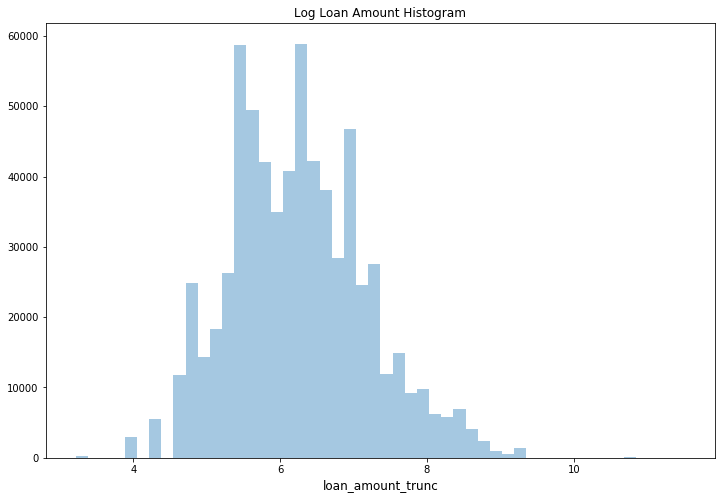

In [61]:
# Distribution of Loan Amount
plt.figure(figsize=(12,8))
sns.distplot(np.log(df_kiva_loans.loan_amount.values), bins=50, kde=False)
plt.xlabel('loan_amount_trunc', fontsize=12)
plt.title("Log Loan Amount Histogram")
plt.show()

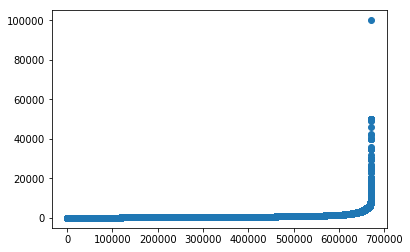

In [62]:
plt.scatter(range(df_kiva_loans.shape[0]), np.sort(df_kiva_loans.funded_amount.values))

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
id,1.000000,-0.049578,-0.027488,0.154787,-0.055832,-0.095418
funded_amount,-0.049578,1.000000,0.945044,-0.075276,0.149310,0.849168
loan_amount,-0.027488,0.945044,1.000000,-0.071251,0.184795,0.798697
partner_id,0.154787,-0.075276,-0.071251,1.000000,0.094878,-0.008575
term_in_months,-0.055832,0.149310,0.184795,0.094878,1.000000,0.227283
lender_count,-0.095418,0.849168,0.798697,-0.008575,0.227283,1.000000


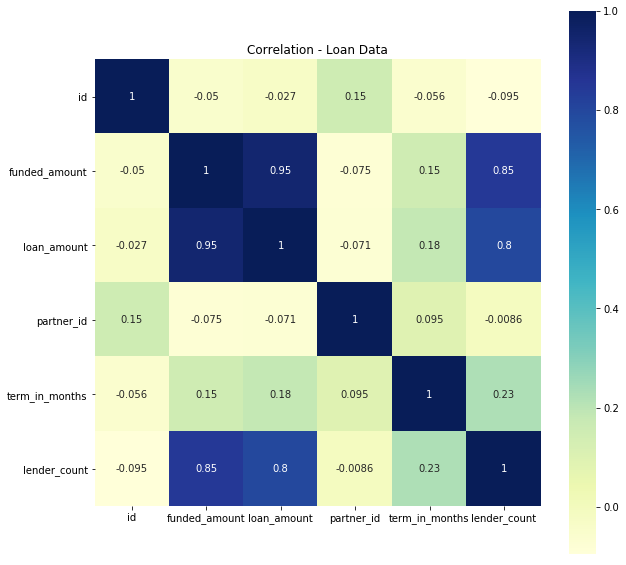

In [5]:
# Correlation Heatmap for Kiva Loans dataset
corr_loan = df_kiva_loans.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_loan, 
            xticklabels=corr_loan.columns.values,
            yticklabels=corr_loan.columns.values, cmap="YlGnBu",annot=True,square=True)
plt.title('Correlation - Loan Data')
corr_loan

** OBSERVATION: Funded Amount, Loan Amount and Lender Count are highly correlated**


In [6]:
# Identify rows with no funding (Funding amount = 0)
df_nofund = df_kiva_loans[(df_kiva_loans['funded_amount']==0)]
df_nofund.shape

(3383, 20)


 **OBSERVATION: There are about 3383 rows with funded amount = 0**  <font size="4">$\color{red}{\text{Is there any pattern among loans that are not funded?}}$ </font>


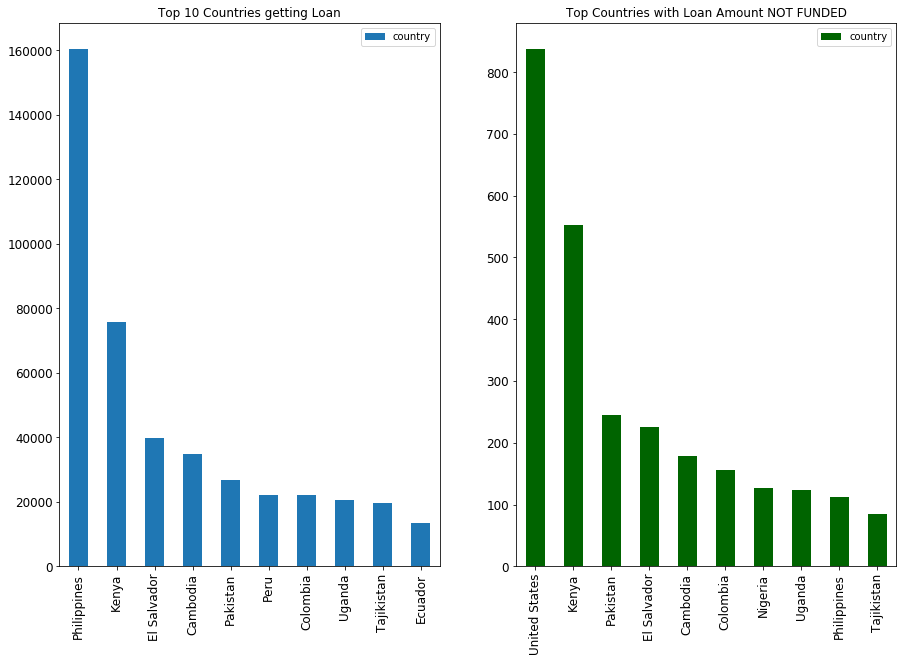

In [51]:
# Plot side by side - Top Countries based on Loan Amount & Top Countries not getting funds
plt.subplot(1, 2, 1)
df_kiva_loans['country'].value_counts().head(10).plot(kind='bar', title ="Top 10 Countries getting Loan", figsize=(15, 10), legend=True, fontsize=12)
plt.subplot(1, 2, 2)
df_nofund['country'].value_counts().head(10).plot(kind='bar', title ="Top Countries with Loan Amount NOT FUNDED", figsize=(15, 10), legend=True, fontsize=12, color = 'DarkGreen')

**OBSERVATION: Philippines, Kenya and El Salvador are the top 3 countries featuring in Loans dataset.  United States, Kenya and Pakistan are the countries top countries with loan amount not funded**

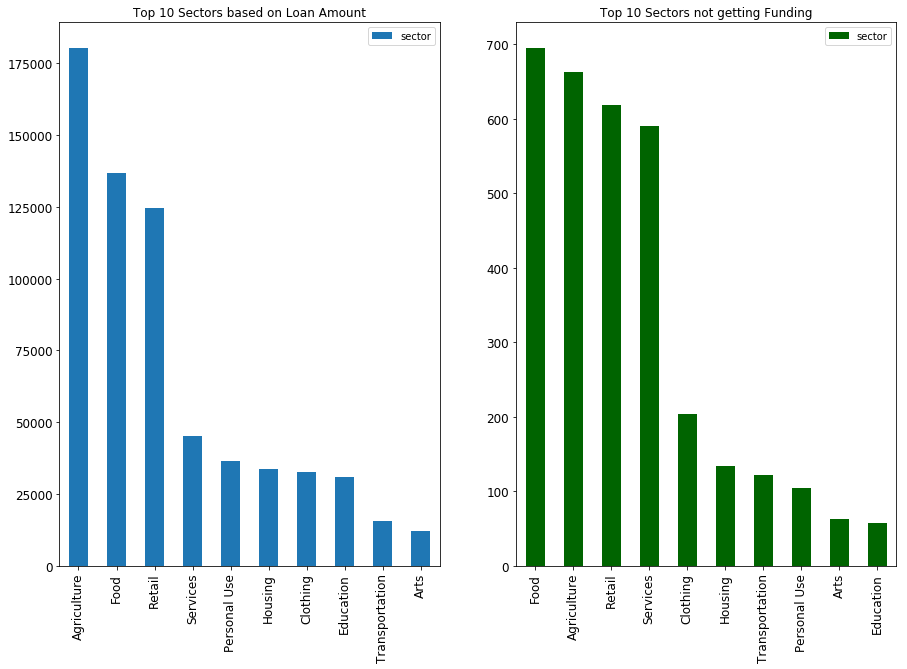

In [53]:
# Plot side by side - Top Sectors based on Loan Amount & Top Sectors not getting funds
plt.subplot(1, 2, 1)
df_kiva_loans['sector'].value_counts().head(10).plot(kind='bar', title ="Top 10 Sectors based on Loan Amount", figsize=(15, 10), legend=True, fontsize=12)
plt.subplot(1, 2, 2)
df_nofund['sector'].value_counts().head(10).plot(kind='bar', title ="Top 10 Sectors not getting Funding", figsize=(15, 10), legend=True, fontsize=12, color = 'DarkGreen')

**OBSERVATION: Agriculture, Food and Retail are the top 3 sectors based on Loan Amount.  And these are the top 3 that are not getting funds **

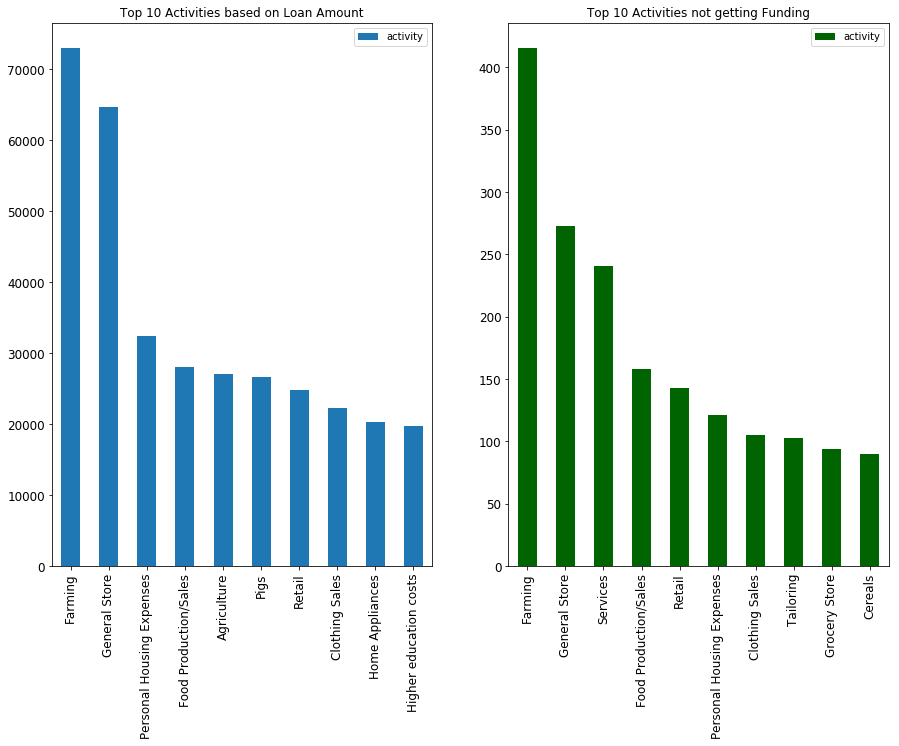

In [55]:
# Plot side by side - Top Activities based on Loan Amount & Top Activities not getting funds
plt.subplot(1, 2, 1)
df_kiva_loans['activity'].value_counts().head(10).plot(kind='bar', title ="Top 10 Activities based on Loan Amount", figsize=(15, 10), legend=True, fontsize=12)
plt.subplot(1, 2, 2)
df_nofund['activity'].value_counts().head(10).plot(kind='bar', title ="Top 10 Activities not getting Funding", figsize=(15, 10), legend=True, fontsize=12, color = 'DarkGreen')

** OBSERVATION: Farming is the top activity based on Loan Amount, followed by General Store and Personal Housing Expenses**

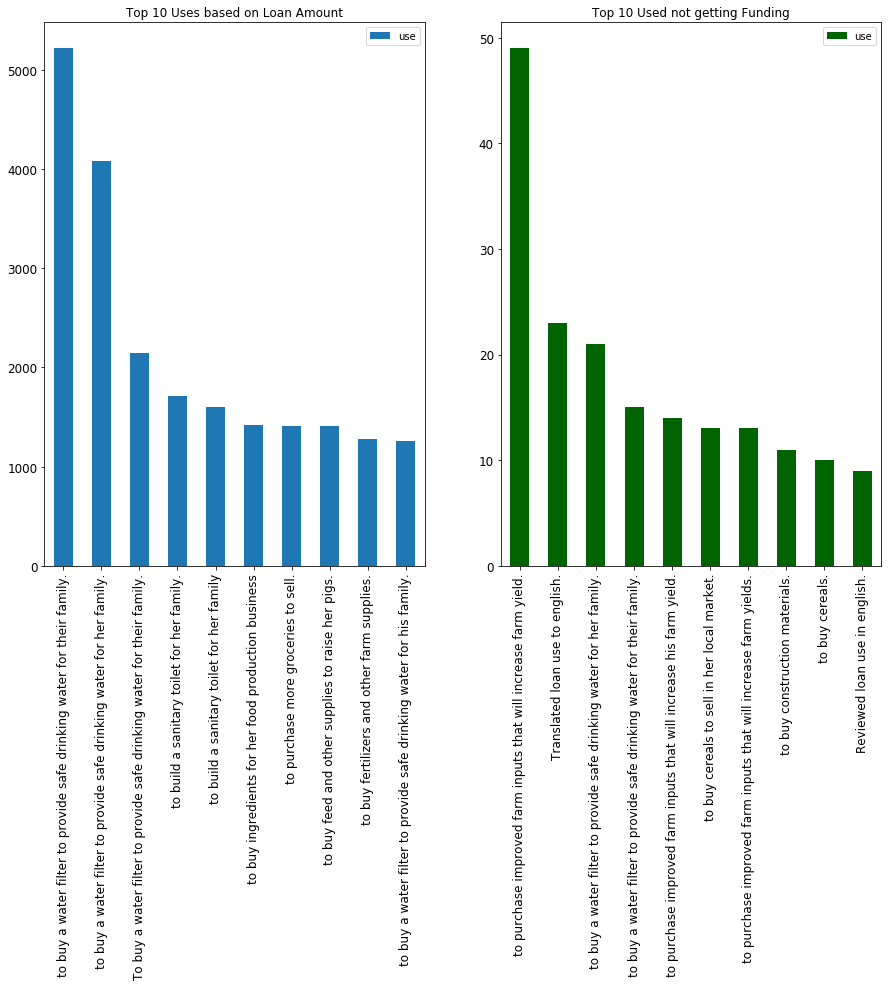

In [60]:
# Plot side by side - Top Uses based on Loan Amount & Top Uses not getting funds
plt.subplot(1, 2, 1)
df_kiva_loans['use'].value_counts().head(10).plot(kind='bar', title ="Top 10 Uses based on Loan Amount", figsize=(15, 10), legend=True, fontsize=12)
plt.subplot(1, 2, 2)
df_nofund['use'].value_counts().head(10).plot(kind='bar', title ="Top 10 Used not getting Funding", figsize=(15, 10), legend=True, fontsize=12, color = 'DarkGreen')

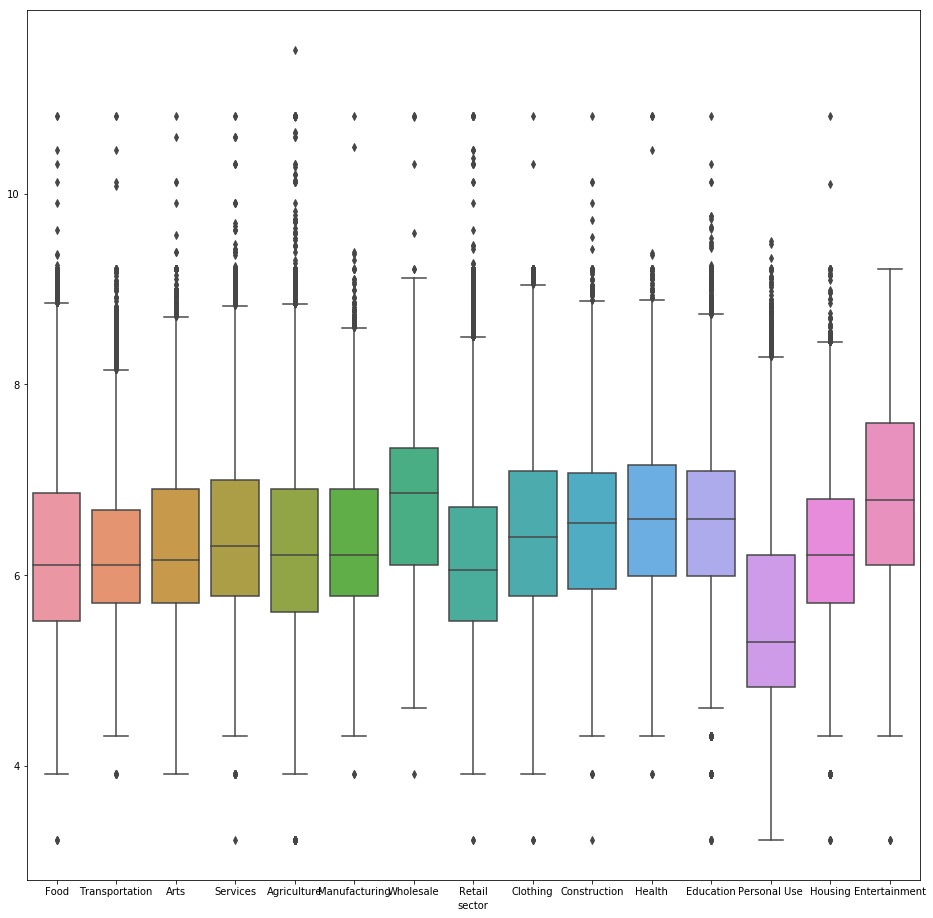

In [64]:
# Plot Loan Amount by Sector  
plt.figure(figsize=(16,16))
sns.boxplot(df_kiva_loans['sector'], np.log(df_kiva_loans.loan_amount.values))


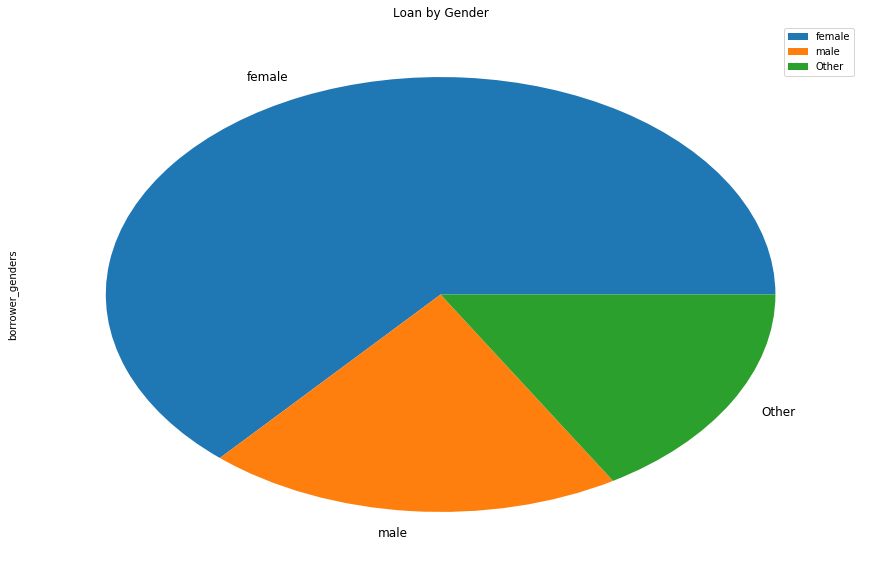

In [59]:
#Loan Count - Split by Gender
df_kiva_loans['borrower_genders']=[elem if elem in ['female','male'] else 'Other' for elem in df_kiva_loans['borrower_genders'] ]

df_kiva_loans['borrower_genders'].value_counts().head(3).plot(kind='pie', title ="Loan by Gender", figsize=(15, 10), legend=True, fontsize=12)

** OBSERVATION: There are more Female borrowers than male **

C:\Users\Amrit\New_Version_Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\Amrit\New_Version_Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



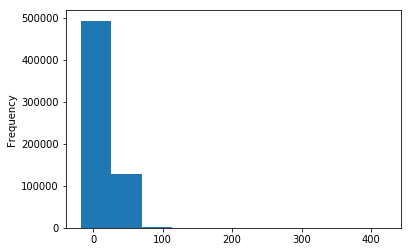

In [13]:
# Determine Time Taken for Funding. It is Loan Posted Time - Funded Time

df_funded = df_kiva_loans[(df_kiva_loans['funded_amount']!=0)]
df_funded.dropna()
df_funded.shape

df_funded['funded_time'] = pd.to_datetime(df_funded['funded_time'])
df_funded['posted_time'] = pd.to_datetime(df_funded['posted_time'])    
time_to_fund = (df_funded.funded_time - df_funded.posted_time)
time_to_fund_in_days = (time_to_fund.astype('timedelta64[s]')/(3600 * 24))
df_funded = df_funded.assign(time_to_fund=time_to_fund)
df_funded = df_funded.assign(time_to_fund_in_days=time_to_fund_in_days)
df_funded.time_to_fund_in_days.plot.hist();

Text(0.5,1,'Scatter Plot of Funded Amount and Term')

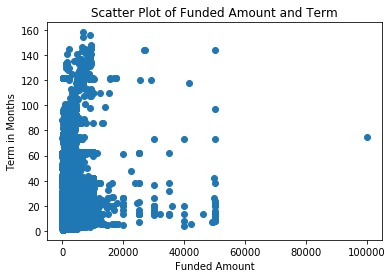

In [16]:
# Funded Amount vs. Term
plt.scatter(df_kiva_loans['funded_amount'], df_kiva_loans['term_in_months'])
plt.xlabel('Funded Amount')
plt.ylabel('Term in Months')
plt.title('Scatter Plot of Funded Amount and Term')

In [67]:
countries_funded_amount = df_kiva_loans.groupby('country').mean()['funded_amount'].sort_values(ascending = False)
print("Top Countries with funded amount (Mean values)\n",countries_funded_amount.head(10))

Top Countries with funded amount (Mean values)
 country
Cote D'Ivoire         50000.000000
Mauritania            15000.000000
Bhutan                 7812.500000
Chile                  7625.000000
Afghanistan            7000.000000
Congo                  6142.578125
Puerto Rico            4409.191176
Dominican Republic     4200.604839
Namibia                4046.875000
United States          3800.843591
Name: funded_amount, dtype: float64


In [69]:
data = [dict(
        type='choropleth',
        locations= countries_funded_amount.index,
        locationmode='country names',
        z=countries_funded_amount.values,
        text=countries_funded_amount.index,
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Top Countries with funded_amount(Mean value)'),
)]
layout = dict(title = 'Top Countries based on Funded amount',
             geo = dict(
            showframe = False,
            #showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)

**OBSERVATION: Cote D'Ivoire, Mauritania, Bhutan got top funding**   

In [70]:
df_funded
funded_time = df_funded.groupby('country').mean()['time_to_fund_in_days'].sort_values(ascending = False)
print("Top Countries with max funded_time(Mean values)\n",funded_time.head(10))

Top Countries with max funded_time(Mean values)
 country
United States    39.544380
Puerto Rico      38.112630
Vanuatu          35.963452
El Salvador      22.054165
Azerbaijan       21.930762
Bolivia          21.458772
Georgia          20.976522
Armenia          20.607393
Colombia         20.366121
Kenya            20.161696
Name: time_to_fund_in_days, dtype: float64


In [71]:
data = [dict(
        type='choropleth',
        locations= funded_time.index,
        locationmode='country names',
        z=funded_time.values,
        text=funded_time.index,
        colorscale='Red',
        marker=dict(line=dict(width=0.7)),
        colorbar=dict(autotick=False, tickprefix='', title='Top Countries - Funded Time(Mean value)'),
)]
layout = dict(title = 'Top Countries - Funded Time',
             geo = dict(
            showframe = False,
            #showcoastlines = False,
            projection = dict(
                type = 'Mercatorodes'
            )
        ),)
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)


**OBSERVATION: US, Puerto Rico, Vanuata take longer time for funding**

## MPI Region/Location

In [23]:
df_region = pd.read_csv("kiva_mpi_region_locations.csv")
df_region.head()

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [24]:
df_region['world_region'].unique()

array(['South Asia', 'Europe and Central Asia', 'Sub-Saharan Africa',
       'Latin America and Caribbean', 'East Asia and the Pacific',
       'Arab States', nan], dtype=object)

C:\Users\Amrit\New_Version_Anaconda\lib\site-packages\mpl_toolkits\basemap\__init__.py:1708: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.

C:\Users\Amrit\New_Version_Anaconda\lib\site-packages\mpl_toolkits\basemap\__init__.py:1711: MatplotlibDeprecationWarning:

The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.



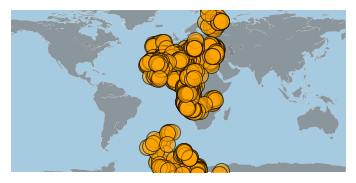

In [25]:
m=Basemap(llcrnrlon=-160, llcrnrlat=-75,urcrnrlon=160,urcrnrlat=80)
m.drawmapboundary(fill_color='#A6CAE0', linewidth=0)
m.fillcontinents(color='grey', alpha=0.7, lake_color='grey')
m.drawcoastlines(linewidth=0.1, color="white")
 
# Add a marker per city of the data frame!
m.plot(df_region['lat'], df_region['lon'], linestyle='none', marker="o", markersize=16, alpha=0.6, c="orange", markeredgecolor="black", markeredgewidth=1)

Top Countries with High MPI(Mean values)
 world_region
Sub-Saharan Africa             0.337128
South Asia                     0.219630
East Asia and the Pacific      0.136266
Arab States                    0.115287
Latin America and Caribbean    0.063665
Europe and Central Asia        0.025273
Name: MPI, dtype: float64


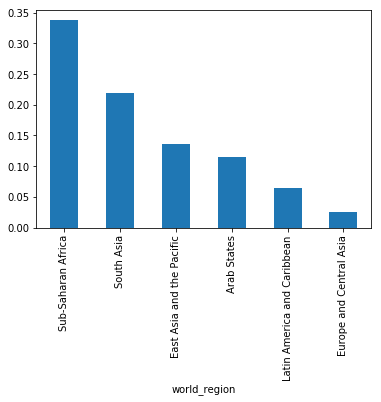

In [66]:
mpi_region = df_region.groupby('world_region').mean()['MPI'].sort_values(ascending = False)
print("Top Countries with High MPI(Mean values)\n",mpi_region.head(10))
mpi_region.plot(kind = 'bar')

** OBSERVATION: As expected, Africa has the HIGHEST Poverty followed by South Asia **

## Loan Theme

In [26]:
df_theme = pd.read_csv("loan_theme_ids.csv")
df_theme.head()

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [27]:
df_theme['Loan Theme Type'].unique()

array(['General', 'Higher Education', 'Subsistence Agriculture',
       'Extreme Poverty', 'Underserved', 'Mobile Transactions', 'Green',
       'End Consumer Finance', 'Agriculture', 'Vulnerable Women',
       'Full Tuition', 'Business in a Box', 'Organic Conversion',
       'Startup', 'Youth', 'Rural Inclusion', 'WLIFT', 'Retailer Finance',
       'FUSAI', 'Water', 'Unbanked', 'Conflict Zone',
       "Hai Duong Women's Union", 'At-Risk Youth', 'Housing Improvement',
       'Haiti', 'Youth Entrepreneurship', 'Primary/Secondary Education',
       'Vulnerable Populations', 'Murabaha', 'Small Enterprise',
       'Agricultural Equipment', 'Artisan', 'Murabaha Youth',
       'Kiva City LA', 'Disaster Recovery', 'First/Second Chance',
       'Women Without Poverty', 'Agricultural Infrastructure',
       'CAMEO Partnership', 'Safe Water System for Institution',
       'Rural Conflict Zone', 'SME', 'Biodigester',
       'Clients below the poverty line', 'Distributor Finance - India',
       '

In [28]:
df_theme_reg = pd.read_csv("loan_themes_by_region.csv")
df_theme_reg

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
5,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,62225,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
6,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,1300,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
7,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000weyk,General,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,237175,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0
8,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000007VvXr,Solar Home Systems,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,3050,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0
9,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Kampong Chhnang Province,"(12.0, 104.5)",KHM,...,31425,"Kampong Chhnang Province, Cambodia","[(12.1392352, 104.5655273)]",Kampong Chhnang Province; Cambodia,"(12.1392352, 104.5655273)",12.139235,104.565527,"Kampong Chhnang, Cambodia","(12.1392352, 104.5655273)",90.0
